<h1> PACKAGES 

In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import auc, roc_curve, accuracy_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import calibration_curve
import warnings

from scipy import stats
#from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVC
from sklearn import metrics

<h1> chargement des données et division 

In [305]:
#chargement des données
df=pd.read_csv('data/df_cleaned.csv')
#on supprime la colonne doublon des indices
df=df.drop(['Unnamed: 0'],axis=1)


In [306]:
#affichage de df 
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,...,25.380,17.33,184.60,1937.05,0.16220,0.62695,0.7119,0.2654,0.41915,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1937.05,0.12380,0.18660,0.2416,0.1860,0.27500,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.00,0.14440,0.42450,0.4504,0.2430,0.36130,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,...,14.910,26.50,98.87,567.70,0.19010,0.62695,0.6869,0.2575,0.41915,0.12301
4,84358402,1,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.00,0.13740,0.20500,0.4000,0.1625,0.23640,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1326.3,0.111000,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,1937.05,0.14100,0.21130,0.4107,0.2216,0.20600,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.097800,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.00,0.11660,0.19220,0.3215,0.1628,0.25720,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.084550,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.00,0.11390,0.30940,0.3403,0.1418,0.22180,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.117800,0.22862,0.28241,0.15200,...,25.740,39.42,184.60,1821.00,0.16500,0.62695,0.7855,0.2650,0.40870,0.12301


In [307]:
y = df["diagnosis"].to_numpy()
X = df.drop(['diagnosis'],axis=1)
X

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,...,25.380,17.33,184.60,1937.05,0.16220,0.62695,0.7119,0.2654,0.41915,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1937.05,0.12380,0.18660,0.2416,0.1860,0.27500,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.00,0.14440,0.42450,0.4504,0.2430,0.36130,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,...,14.910,26.50,98.87,567.70,0.19010,0.62695,0.6869,0.2575,0.41915,0.12301
4,84358402,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.00,0.13740,0.20500,0.4000,0.1625,0.23640,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1326.3,0.111000,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,1937.05,0.14100,0.21130,0.4107,0.2216,0.20600,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.097800,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.00,0.11660,0.19220,0.3215,0.1628,0.25720,0.06637
566,926954,16.60,28.08,108.30,858.1,0.084550,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.00,0.11390,0.30940,0.3403,0.1418,0.22180,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.117800,0.22862,0.28241,0.15200,0.2397,...,25.740,39.42,184.60,1821.00,0.16500,0.62695,0.7855,0.2650,0.40870,0.12301


In [308]:
from sklearn.preprocessing import MinMaxScaler

In [309]:
scaler=MinMaxScaler()
Xnorm=scaler.fit_transform(X)
Xnorm

array([[9.14760426e-04, 7.37918091e-01, 3.26272218e-02, ...,
        9.12027491e-01, 1.00000000e+00, 9.39532147e-01],
       [9.14996350e-04, 9.10851934e-01, 3.92500609e-01, ...,
        6.39175258e-01, 4.51170760e-01, 4.99926438e-01],
       [9.24954884e-02, 8.51866747e-01, 5.61967373e-01, ...,
        8.35051546e-01, 7.79744908e-01, 4.78740621e-01],
       ...,
       [1.00765069e-03, 6.44748308e-01, 8.94570246e-01, ...,
        4.87285223e-01, 2.48619836e-01, 3.40738561e-01],
       [1.00796562e-03, 9.12862792e-01, 9.55441928e-01, ...,
        9.10652921e-01, 9.60213211e-01, 1.00000000e+00],
       [9.22636984e-05, 5.22152959e-02, 7.22181641e-01, ...,
        0.00000000e+00, 4.97239673e-01, 2.25834927e-01]])

<h1> Train/Test Split

In [310]:
from sklearn.model_selection import train_test_split

In [311]:
X_train,X_test,y_train,y_test=train_test_split(Xnorm,y,test_size=0.33,random_state=42)
y_test

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0])

<h1> KFOLD 

In [312]:
from sklearn.model_selection import KFold
from sklearn.utils import class_weight

# Initiate Cross-validation

In [313]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# Compute Class Weights

In [314]:
from sklearn.utils import class_weight

poids=class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y_train),y=y_train)

weight_dict = {np.unique(y)[i]: poids[i] for i in range(len(np.unique(y)))}
weight_dict

{0: 0.8072033898305084, 1: 1.313793103448276}

<h1> Initiation des métriques 

In [315]:
from sklearn.metrics import f1_score, auc, accuracy_score, recall_score, precision_score
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

In [316]:
def draw_confusion_matrix(y_test, y_pred, model):
    # Obtention de la matrice de confusion
    cf_matrix = confusion_matrix(y_test, y_pred)

    # Configuration de la figure
    plt.figure(figsize=(8, 6))

    # Calcul des pourcentages par classe
    cf_matrix_percent = cf_matrix / cf_matrix.sum(axis=1)[:, np.newaxis]

    # Création de la matrice de confusion avec les valeurs numériques
    sns.heatmap(cf_matrix, annot=True, fmt='d', cmap="Blues",
                xticklabels=np.unique(y_train), yticklabels=np.unique(y_train),
                cbar=True)

    # Affichage des pourcentages en dessous des valeurs numériques
    for i in range(cf_matrix.shape[0]):
        for j in range(cf_matrix.shape[1]):
            # Affichage des pourcentages avec une mise en forme différente
            plt.text(j + 0.5, i + 0.6, "{:.2%}".format(cf_matrix_percent[i, j]),
                    ha='center', va='center')

    # Ajout des étiquettes des axes x et y
    plt.ylabel('Valeurs réelles')
    plt.xlabel('Valeurs prédites')
    plt.title("Matrice de Confusion : {}".format(model), size=14)

    # Affichage de la matrice de confusion
    plt.show()

In [317]:
def draw_calibration_curve(y_test, y_pred_proba, model):
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_pred_proba, n_bins=10)
    plt.figure(figsize=(8, 6))
    plt.plot(mean_predicted_value, fraction_of_positives, 's-', color='b', linewidth=2, label = "{}".format(model))
    plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label = "Parfaitement Calibrée")
    plt.xlabel('Valeur prédite moyenne')
    plt.ylabel('Fraction de positifs réels')
    plt.legend()
    plt.show()

In [318]:
def draw_roc_curbe(y_test, y_pred_proba, model):
    from sklearn.metrics import auc
    fpr, tpr, tresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
    score = auc(fpr, tpr)  
    plt.figure(figsize = (14, 8))
    plt.plot(fpr, tpr, label="ROC curve(area = %0.3f)" % score)
    plt.plot([0, 1], [0, 1], color="red",label="Random Baseline", linestyle="--")
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Courbe Roc : {}".format(model), size=18)
    plt.legend(loc="lower right") 
    plt.show()

In [319]:
model_result = pd.DataFrame(columns= ["Model", "Accuracy", "Recall", "Precision", "F1_score", "AUC"])

<h1> Régression Logistique

In [320]:
%%time 
#initiation du modèle
lr=LogisticRegression()
#on fit les données à la régression
lr.fit(X_train,y_train)
#prédictions
y_pred=lr.predict(X_test)
#proba
y_pred_proba=lr.predict_proba(X_test)[:,1]
fpr, tpr, tresholds = roc_curve(y_test, y_pred_proba, pos_label=1)

#Store the performance in a df
result = pd.DataFrame({"Model" : ["LogisticRegression"],
                       "Accuracy" : [accuracy_score(y_test, y_pred)],
                       "Recall" : [recall_score(y_test, y_pred)],
                       "Precision" : [precision_score(y_test, y_pred)],
                       "F1_score" : [f1_score(y_test, y_pred, average="macro")],
                       "AUC" : [auc(fpr, tpr)]}
                       )

model_result = pd.concat([model_result, result])
print(model_result)

                Model  Accuracy    Recall  Precision  F1_score       AUC
0  LogisticRegression  0.989362  0.985075   0.985075  0.988405  0.998643
CPU times: user 90.2 ms, sys: 37.3 ms, total: 127 ms
Wall time: 19 ms


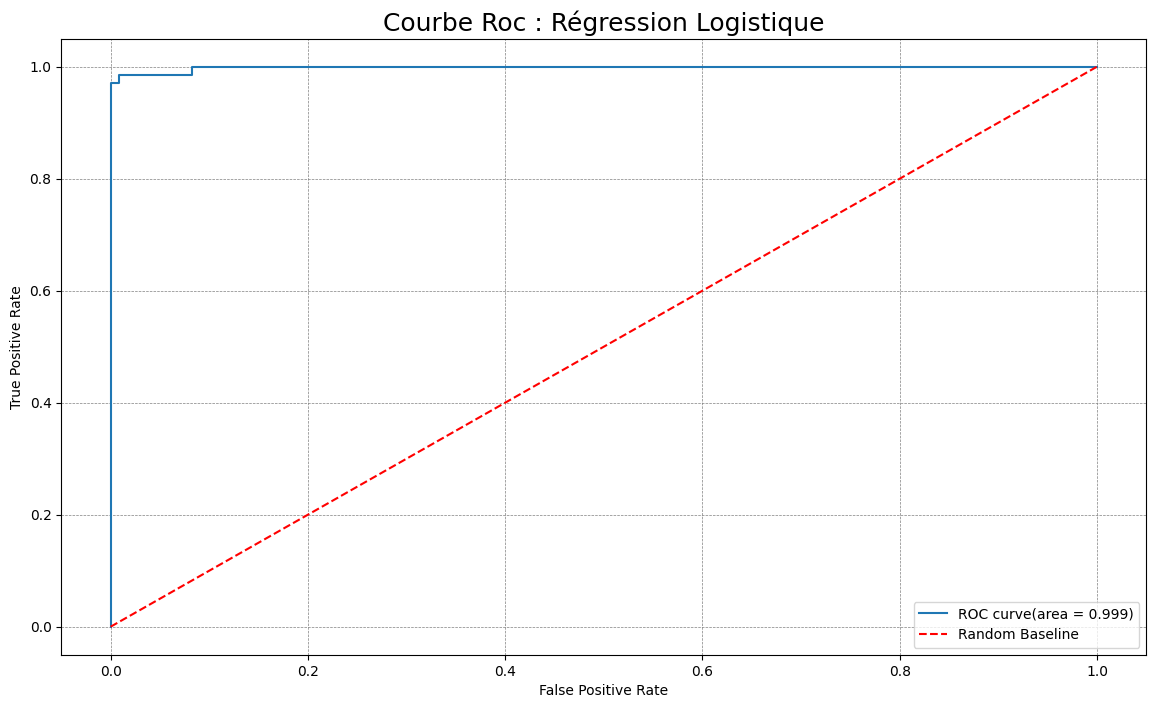

In [321]:
draw_roc_curbe(y_test, y_pred_proba, "Régression Logistique")

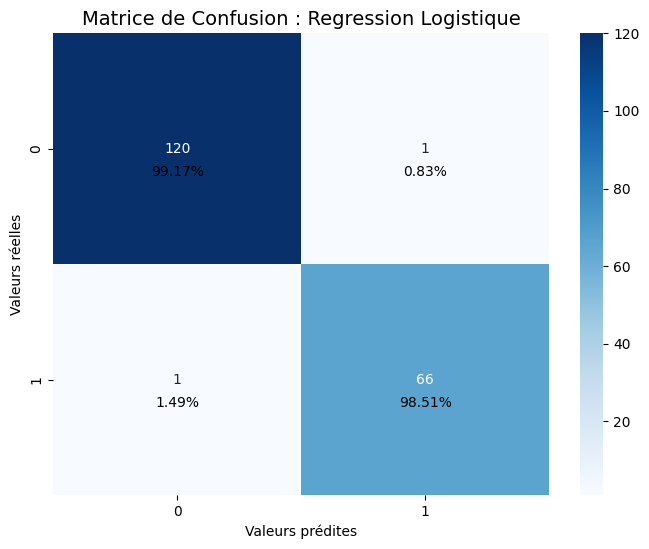

In [322]:
draw_confusion_matrix(y_test, y_pred, "Regression Logistique")


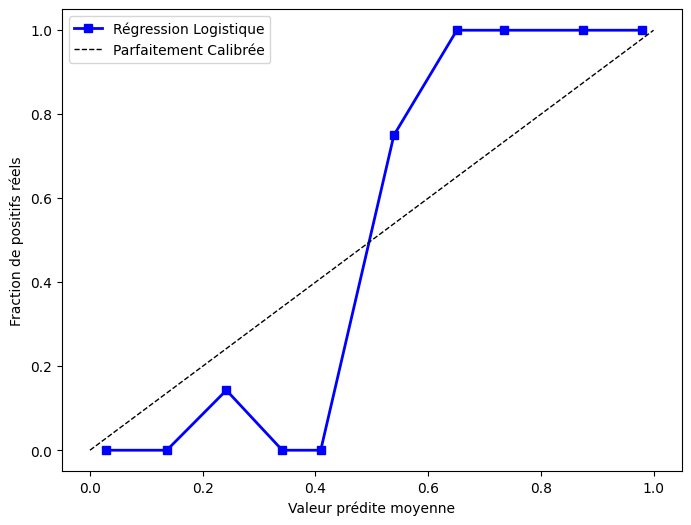

In [323]:
draw_calibration_curve(y_test, y_pred_proba, "Régression Logistique")

<h2> Logistic Regression en GridSearch

In [324]:
%%time

param_grid = {'penalty': [ 'l2'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'class_weight': [None, 'balanced', weight_dict],
              'solver' : ['newton-cg']}

lr_model = LogisticRegression(max_iter = 1000)

lr_model_gr = GridSearchCV(lr_model, param_grid=param_grid, cv=cv,
                           scoring= "roc_auc", refit= "roc_auc", n_jobs=-1, error_score= 'raise')

lr_model_gr.fit(X_train, y_train)

print("\nPrédiction :\n")
y_pred = lr_model_gr.predict(X_test)
y_pred_proba = lr_model_gr.predict_proba(X_test)[:,1]
fpr, tpr, tresholds = roc_curve(y_test, y_pred_proba, pos_label=1)

#Store the performance in a df
result = pd.DataFrame({"Model" : ["GridSearch Logisctic Regression"],
                       "Accuracy" : [accuracy_score(y_test, y_pred)],
                       "Recall" : [recall_score(y_test, y_pred)],
                       "Precision" : [precision_score(y_test, y_pred)],
                       "F1_score" : [f1_score(y_test, y_pred, average="macro")],
                       "AUC" : [auc(fpr, tpr)]}
                       )

model_result = pd.concat([model_result, result])
print(model_result)


Prédiction :

                             Model  Accuracy    Recall  Precision  F1_score  \
0               LogisticRegression  0.989362  0.985075   0.985075  0.988405   
0  GridSearch Logisctic Regression  0.984043  0.985075   0.970588  0.982665   

        AUC  
0  0.998643  
0  0.998643  
CPU times: user 139 ms, sys: 75.1 ms, total: 214 ms
Wall time: 854 ms


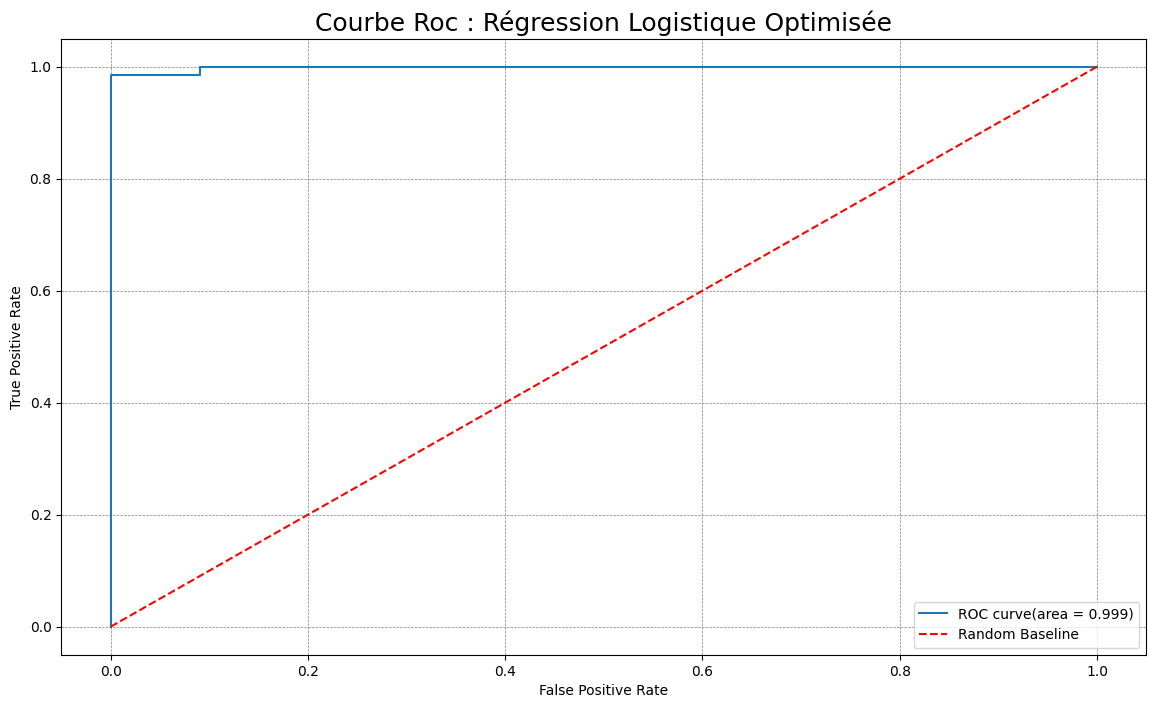

In [325]:
draw_roc_curbe(y_test, y_pred_proba, "Régression Logistique Optimisée")

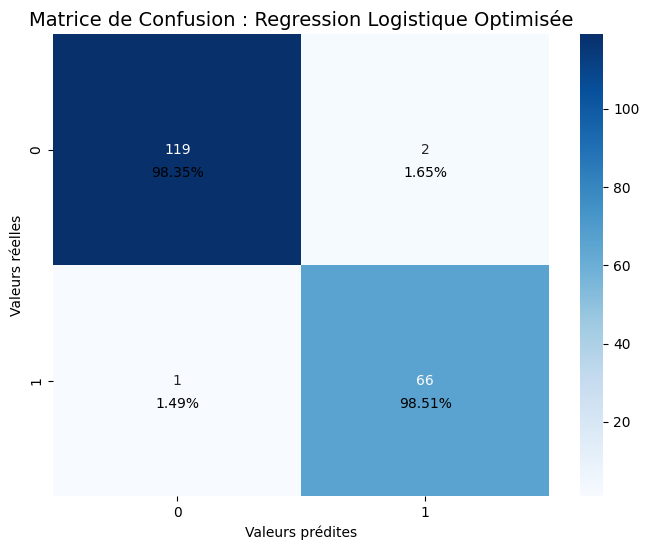

In [326]:
draw_confusion_matrix(y_test, y_pred, "Regression Logistique Optimisée")

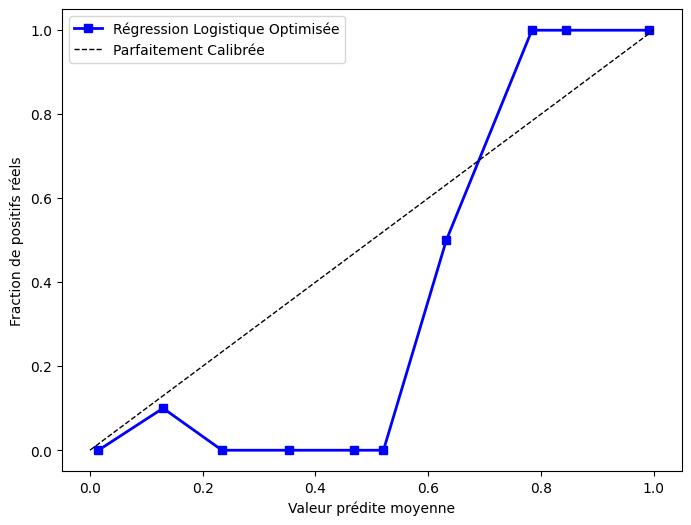

In [327]:
draw_calibration_curve(y_test, y_pred_proba, "Régression Logistique Optimisée")


In [328]:
# Obtain coefficient values and feature names
coef = lr_model_gr.best_estimator_.coef_.ravel()
feature_names = X.columns

# Create a pandas dataframe to display the results
coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coef})
coef_df = coef_df.sort_values("Coefficient", ascending=False)

# Print the table of coefficient values
print("Table of Coefficient Values:\n")
coef_df

Table of Coefficient Values:



,Feature,Coefficient
22,texture_worst,4.875750
29,symmetry_worst,4.132545
14,area_se,3.685241
8,concave points_mean,3.599007
28,concave points_worst,3.099395
27,concavity_worst,2.758686
2,texture_mean,2.758458
25,smoothness_worst,2.620345
7,concavity_mean,2.571131
24,area_worst,2.505926


<h1> Arbre de décision 

In [329]:
%%time
from sklearn.tree import DecisionTreeClassifier

# Initiation du modèle
dt = DecisionTreeClassifier()

# On fit les données à l'arbre de décision
dt.fit(X_train, y_train)

# Prédictions
y_pred = dt.predict(X_test)

# Probabilités
y_pred_proba = dt.predict_proba(X_test)[:, 1]
fpr, tpr, tresholds = roc_curve(y_test, y_pred_proba, pos_label=1)

# Store the performance in a DataFrame
result = pd.DataFrame({"Model": ["DecisionTreeClassifier"],
                       "Accuracy": [accuracy_score(y_test, y_pred)],
                       "Recall": [recall_score(y_test, y_pred)],
                       "Precision": [precision_score(y_test, y_pred)],
                       "F1_score": [f1_score(y_test, y_pred, average="macro")],
                       "AUC": [auc(fpr, tpr)]}
                     )

model_result = pd.concat([model_result, result])
print(model_result)


                             Model  Accuracy    Recall  Precision  F1_score  \
0               LogisticRegression  0.989362  0.985075   0.985075  0.988405   
0  GridSearch Logisctic Regression  0.984043  0.985075   0.970588  0.982665   
0           DecisionTreeClassifier  0.904255  0.910448   0.835616  0.897579   

        AUC  
0  0.998643  
0  0.998643  
0  0.905637  
CPU times: user 21.6 ms, sys: 1.65 ms, total: 23.2 ms
Wall time: 7.5 ms


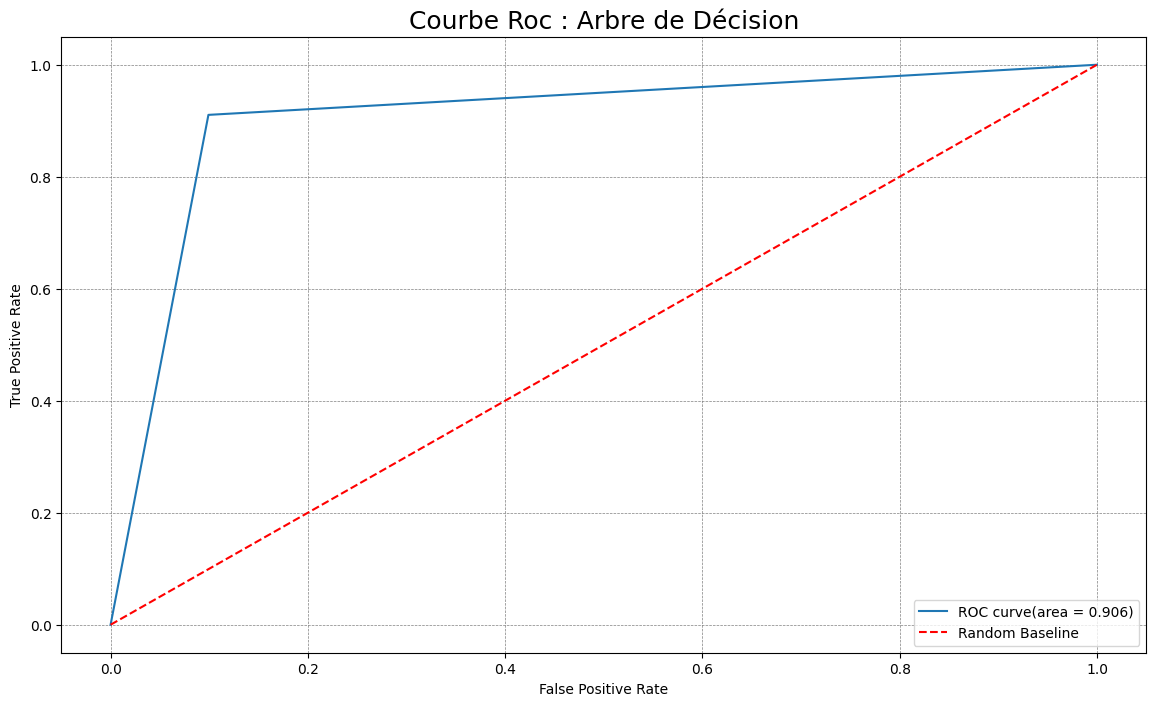

In [330]:
draw_roc_curbe(y_test, y_pred_proba, "Arbre de Décision")

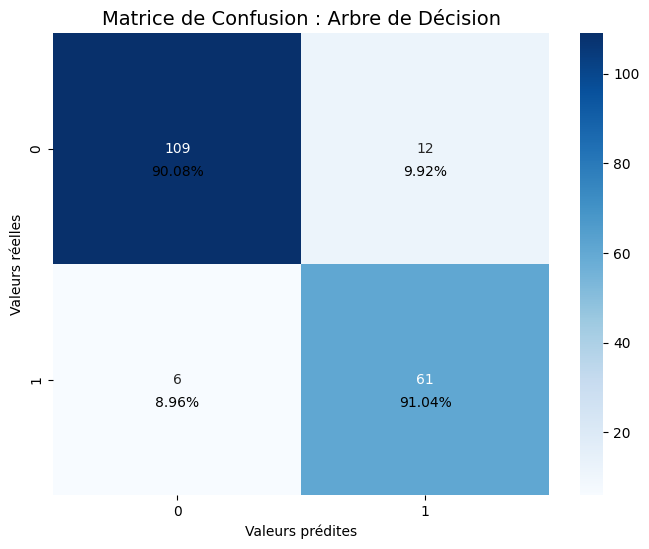

In [331]:
draw_confusion_matrix(y_test, y_pred, "Arbre de Décision")


<h3> courbe de calibration

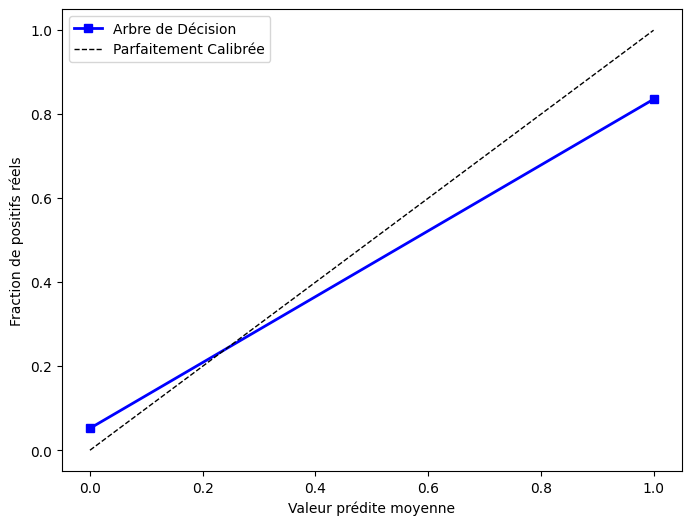

In [332]:
draw_calibration_curve(y_test, y_pred_proba, "Arbre de Décision")


<h3> Importance des variables 

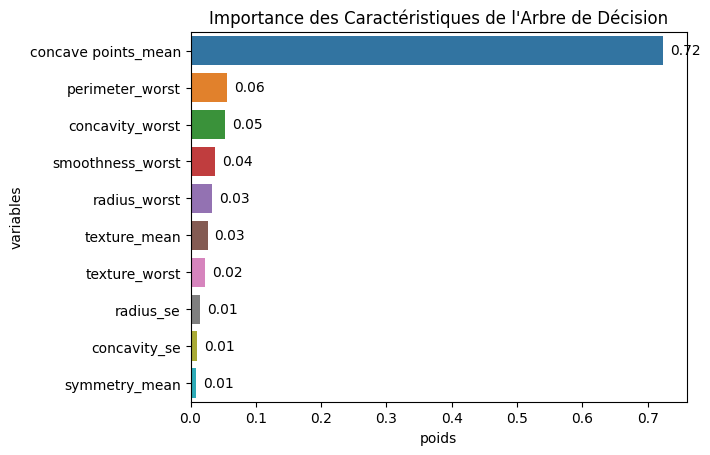

In [333]:
importance_df = pd.DataFrame({
    'variables': X.columns,
    'poids': dt.feature_importances_
}).sort_values('poids', ascending=False)

plt.title("Importance des Caractéristiques de l'Arbre de Décision")
ax = sns.barplot(data=importance_df.head(10), x='poids', y='variables')

# Afficher les valeurs en bout de barre
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.2f'), (p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', ha='left', va='center')

plt.show()


<h1> GridSearch Abre de décision

In [334]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à rechercher
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': [None, 'sqrt', 'log2'],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'class_weight': [None, 'balanced']
}

# Créer un classifieur d'arbre de décision
dt_gr = DecisionTreeClassifier()

# Effectuer la recherche de grille
grid_search = GridSearchCV(estimator=dt_gr, param_grid=param_grid, cv=cv)
grid_search.fit(X, y)

# Afficher les meilleurs hyperparamètres et la meilleure précision
print("Meilleurs hyperparamètres : ", grid_search.best_params_)


from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Effectuer la prédiction sur les données de test
y_pred = grid_search.predict(X_test)

# Calculer les mesures de performance
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="macro")
auc = roc_auc_score(y_test, y_pred)

# Stocker les performances dans un DataFrame
result = pd.DataFrame({"Model": ["GridSearch DecisionTreeClassifier"],
                       "Accuracy": [accuracy],
                       "Recall": [recall],
                       "Precision": [precision],
                       "F1_score": [f1],
                       "AUC": [auc]}
                     )

# Concaténer les résultats avec le DataFrame existant
model_result = pd.concat([model_result, result])
print(model_result)

Meilleurs hyperparamètres :  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10}
                               Model  Accuracy    Recall  Precision  F1_score  \
0                 LogisticRegression  0.989362  0.985075   0.985075  0.988405   
0    GridSearch Logisctic Regression  0.984043  0.985075   0.970588  0.982665   
0             DecisionTreeClassifier  0.904255  0.910448   0.835616  0.897579   
0  GridSearch DecisionTreeClassifier  0.861702  0.746269   0.847458  0.844825   

        AUC  
0  0.998643  
0  0.998643  
0  0.905637  
0  0.835944  


/Users/alexisrevelle/miniconda3/envs/credit_risque/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


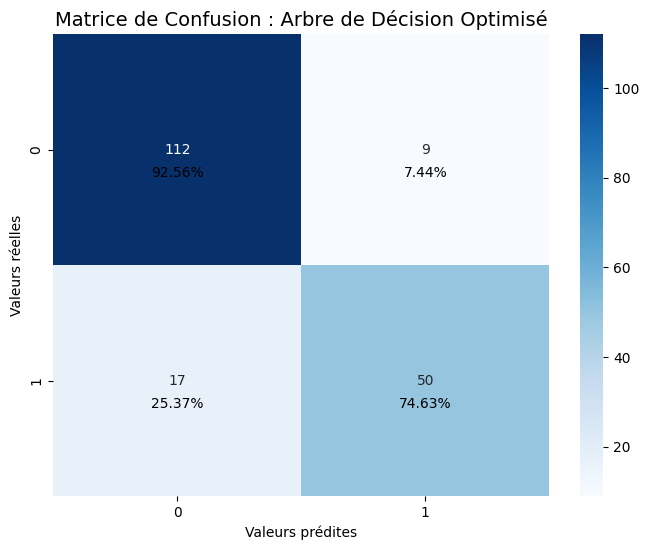

In [335]:
draw_confusion_matrix(y_test, y_pred, "Arbre de Décision Optimisé")


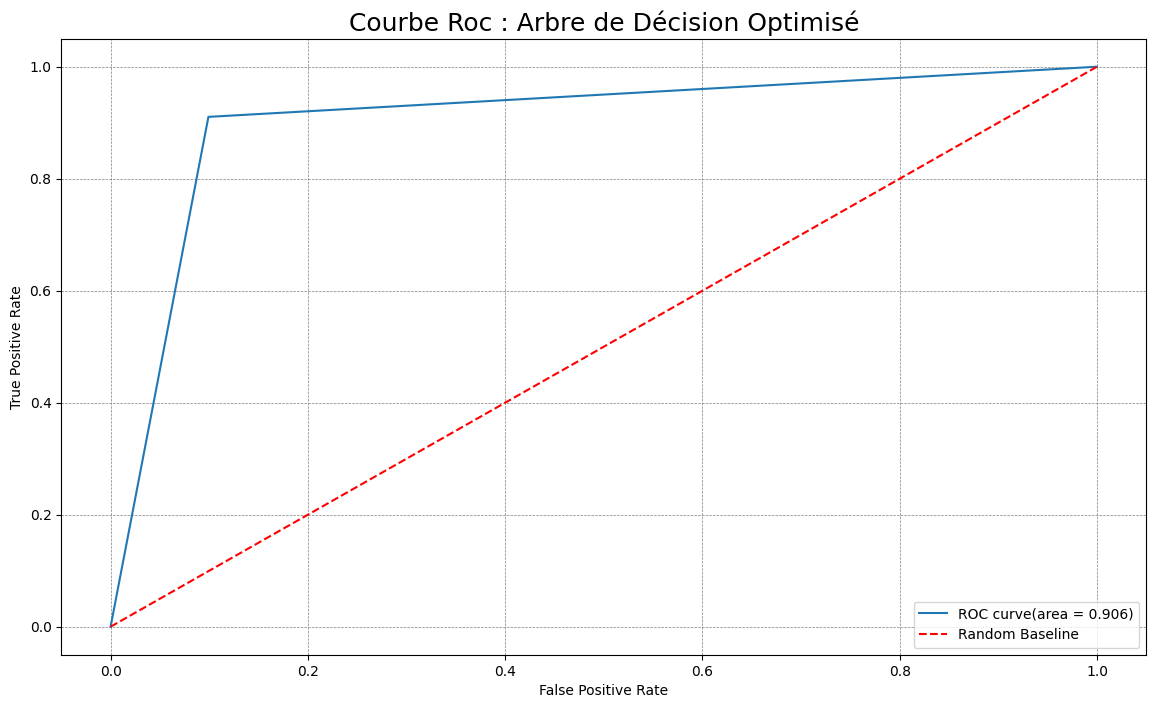

In [336]:
draw_roc_curbe(y_test, y_pred_proba, "Arbre de Décision Optimisé")


<h3> courbe de calibration

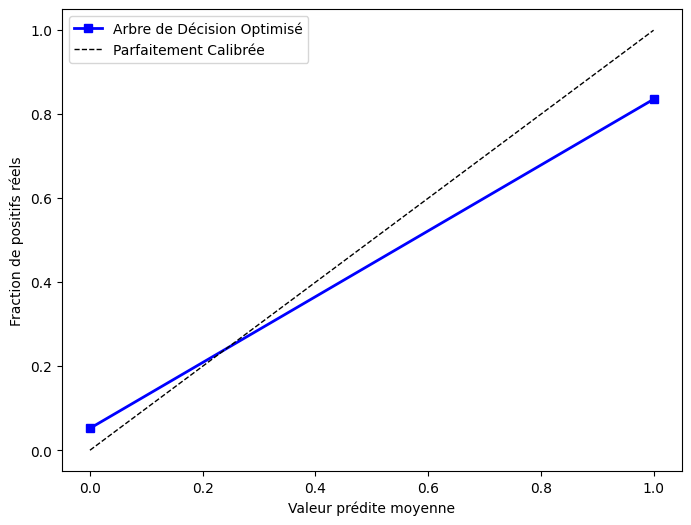

In [337]:
draw_calibration_curve(y_test, y_pred_proba, "Arbre de Décision Optimisé")

<h3> importance des variables 

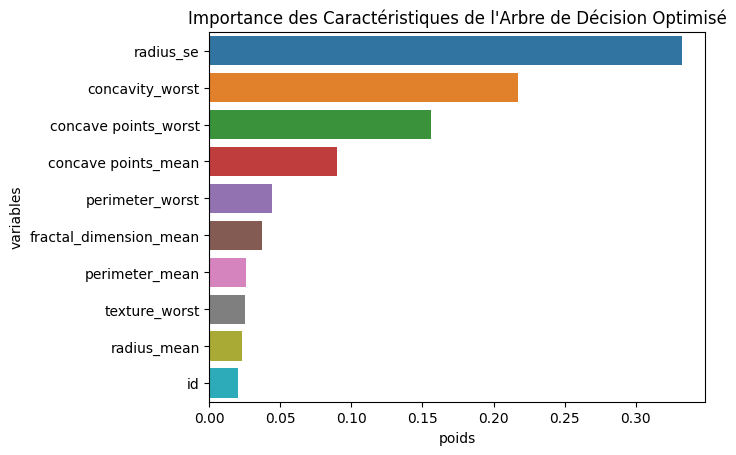

In [338]:
# Obtenez le meilleur estimateur à partir du grid search
best_estimator = grid_search.best_estimator_

# Obtenir l'importance des caractéristiques
importances = best_estimator.feature_importances_

importance_df = pd.DataFrame({
    'variables': X.columns,
    'poids': importances
}).sort_values('poids', ascending=False)

# Tracer le graphique des caractéristiques importantes
plt.title("Importance des Caractéristiques de l'Arbre de Décision Optimisé")
sns.barplot(data=importance_df.head(10), x='poids', y='variables')

# Afficher les valeurs en bout de barre
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.2f'), (p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', ha='left', va='center')

plt.show()


<h1> Descent Gradient

In [339]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialisation du modèle Gradient Boosting
gb = GradientBoostingClassifier()

# Entraînement du modèle
gb.fit(X_train, y_train)

# Prédictions
y_pred = gb.predict(X_test)

# Probabilités
y_pred_proba = gb.predict_proba(X_test)[:, 1]
fpr, tpr, tresholds = roc_curve(y_test, y_pred_proba, pos_label=1)

In [340]:
from sklearn.metrics import roc_auc_score



In [341]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialisation du modèle Gradient Boosting
gb = GradientBoostingClassifier()

# Entraînement du modèle
gb.fit(X_train, y_train)

# Prédictions
y_pred = gb.predict(X_test)

# Probabilités
y_pred_proba = gb.predict_proba(X_test)[:, 1]
fpr, tpr, tresholds = roc_curve(y_test, y_pred_proba, pos_label=1)

# Stocker les performances dans un DataFrame
result = pd.DataFrame({"Model": ["Descent Gradient"],
                       "Accuracy": [accuracy_score(y_test, y_pred)],
                       "Recall": [recall_score(y_test, y_pred)],
                       "Precision": [precision_score(y_test, y_pred)],
                       "F1_score": [f1_score(y_test, y_pred, average="macro")],
                       "AUC": [roc_auc_score(y_test, y_pred_proba)]}
                     )

model_result = pd.concat([model_result, result])
print(model_result)


                               Model  Accuracy    Recall  Precision  F1_score  \
0                 LogisticRegression  0.989362  0.985075   0.985075  0.988405   
0    GridSearch Logisctic Regression  0.984043  0.985075   0.970588  0.982665   
0             DecisionTreeClassifier  0.904255  0.910448   0.835616  0.897579   
0  GridSearch DecisionTreeClassifier  0.861702  0.746269   0.847458  0.844825   
0                   Descent Gradient  0.952128  0.925373   0.939394  0.947647   

        AUC  
0  0.998643  
0  0.998643  
0  0.905637  
0  0.835944  
0  0.992229  


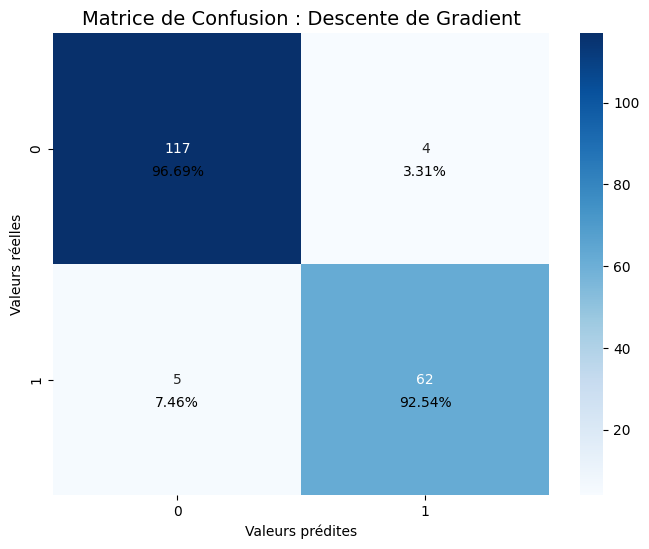

In [342]:
draw_confusion_matrix(y_test, y_pred, "Descente de Gradient")


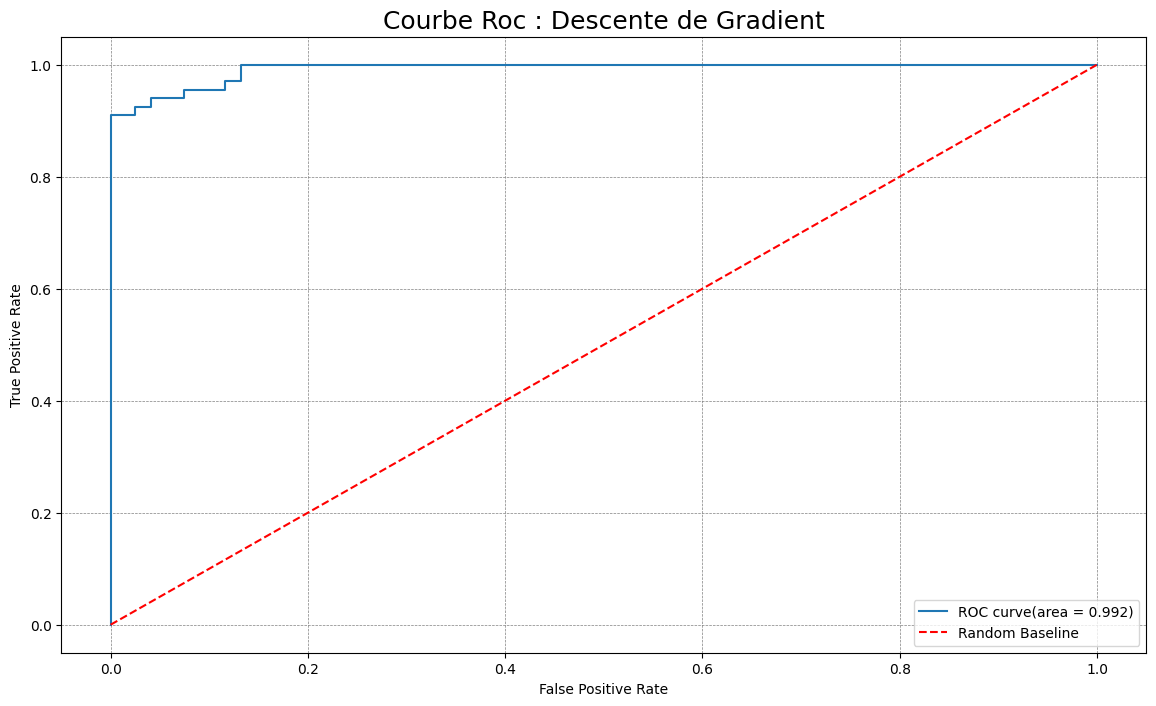

In [343]:
draw_roc_curbe(y_test, y_pred_proba, "Descente de Gradient")

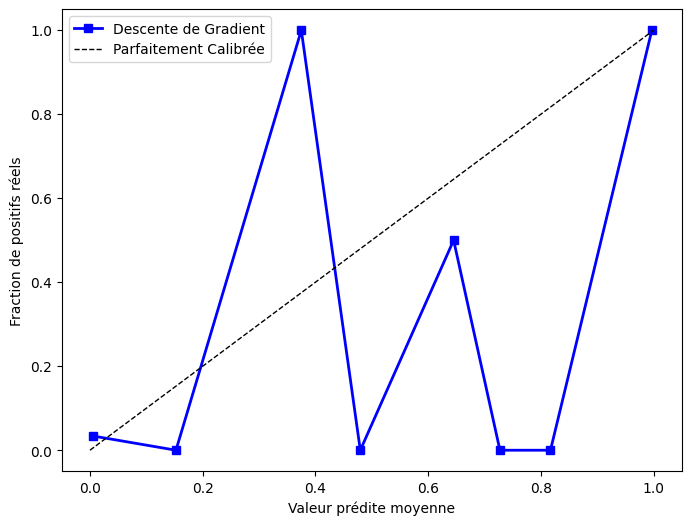

In [344]:
draw_calibration_curve(y_test, y_pred_proba, "Descente de Gradient")

<h3> importance des variables 

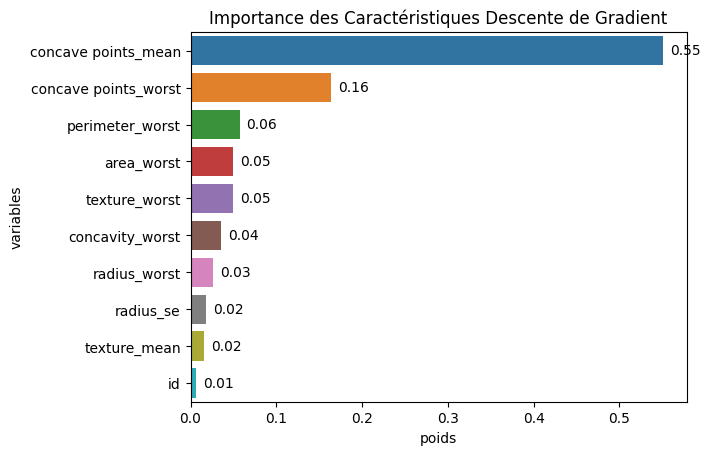

In [345]:
importance_df = pd.DataFrame({
    'variables': X.columns,
    'poids': gb.feature_importances_
}).sort_values('poids', ascending=False)

plt.title("Importance des Caractéristiques Descente de Gradient")
ax = sns.barplot(data=importance_df.head(10), x='poids', y='variables')

# Afficher les valeurs en bout de barre
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.2f'), (p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', ha='left', va='center')

plt.show()


<h1> GridSearch Descent Gradient

In [346]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Définition des hyperparamètres à tester
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# Initialisation du modèle Gradient Boosting
gb_gr = GradientBoostingClassifier()

# Recherche de grille
gb_gr = GridSearchCV(estimator=gb_gr, param_grid=param_grid, cv=3)
gb_gr.fit(X_train, y_train)

# Meilleur modèle trouvé
best_model = gb_gr.best_estimator_

# Prédictions
y_pred = gb_gr.predict(X_test)

# Probabilités
y_pred_proba = gb_gr.predict_proba(X_test)[:, 1]
fpr, tpr, tresholds = roc_curve(y_test, y_pred_proba, pos_label=1)

# Stocker les performances dans un DataFrame
result = pd.DataFrame({"Model": ["GridSearch Descent Gradient"],
                       "Accuracy": [accuracy_score(y_test, y_pred)],
                       "Recall": [recall_score(y_test, y_pred)],
                       "Precision": [precision_score(y_test, y_pred)],
                       "F1_score": [f1_score(y_test, y_pred, average="macro")],
                       "AUC": [roc_auc_score(y_test, y_pred_proba)]}
                     )

model_result = pd.concat([model_result, result])
print(model_result)


                               Model  Accuracy    Recall  Precision  F1_score  \
0                 LogisticRegression  0.989362  0.985075   0.985075  0.988405   
0    GridSearch Logisctic Regression  0.984043  0.985075   0.970588  0.982665   
0             DecisionTreeClassifier  0.904255  0.910448   0.835616  0.897579   
0  GridSearch DecisionTreeClassifier  0.861702  0.746269   0.847458  0.844825   
0                   Descent Gradient  0.952128  0.925373   0.939394  0.947647   
0        GridSearch Descent Gradient  0.957447  0.925373   0.953846  0.953304   

        AUC  
0  0.998643  
0  0.998643  
0  0.905637  
0  0.835944  
0  0.992229  
0  0.993092  


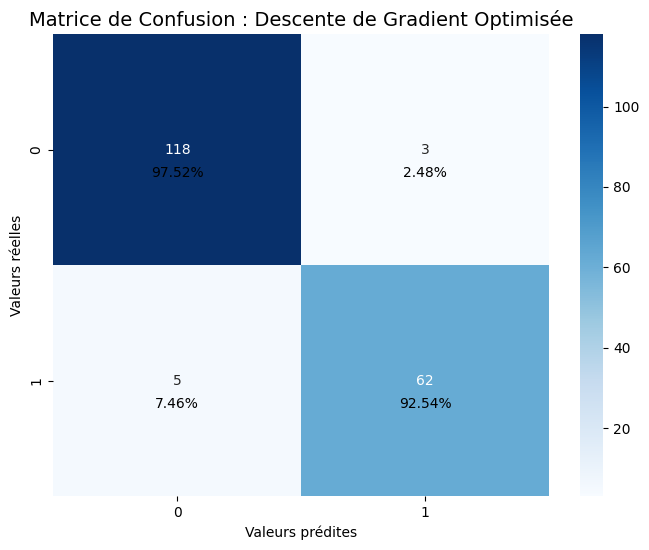

In [347]:
draw_confusion_matrix(y_test, y_pred, "Descente de Gradient Optimisée")

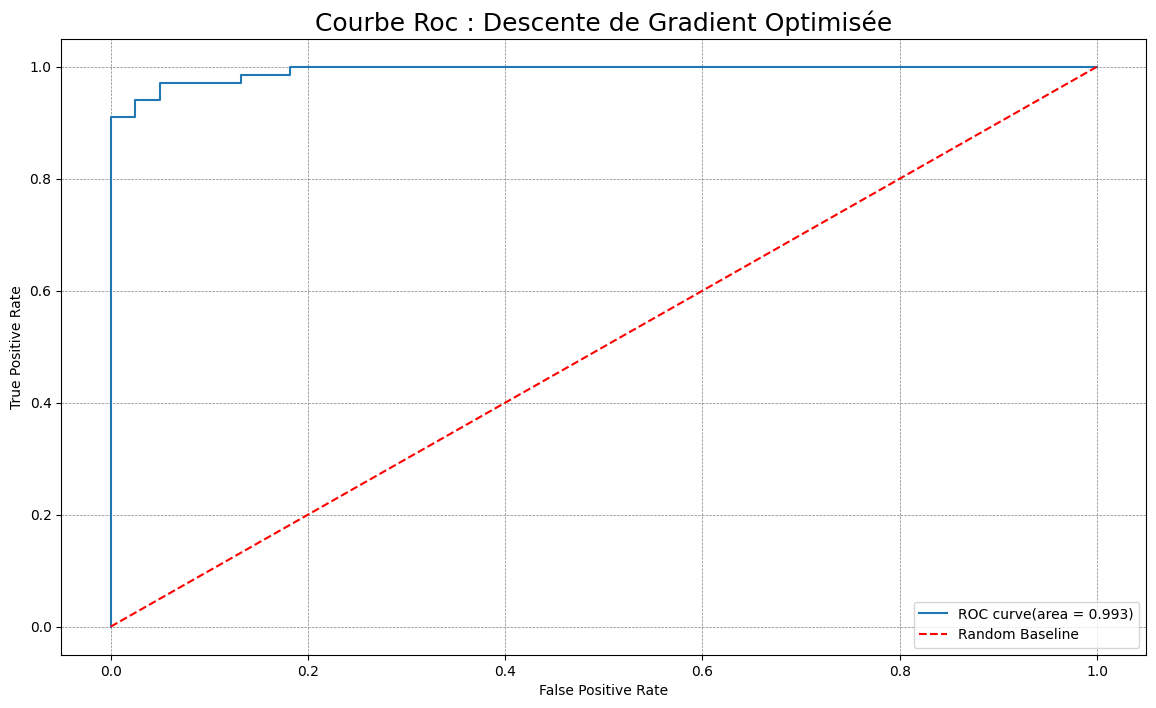

In [348]:
draw_roc_curbe(y_test, y_pred_proba, "Descente de Gradient Optimisée")

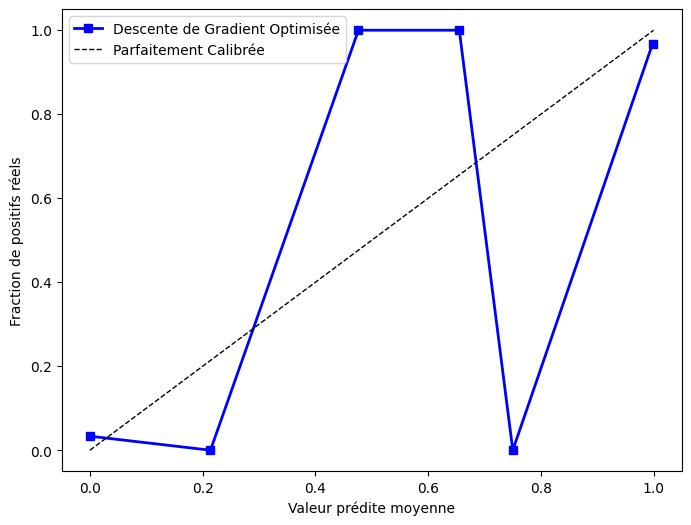

In [349]:
draw_calibration_curve(y_test, y_pred_proba, "Descente de Gradient Optimisée")


<h3> importance des variables 

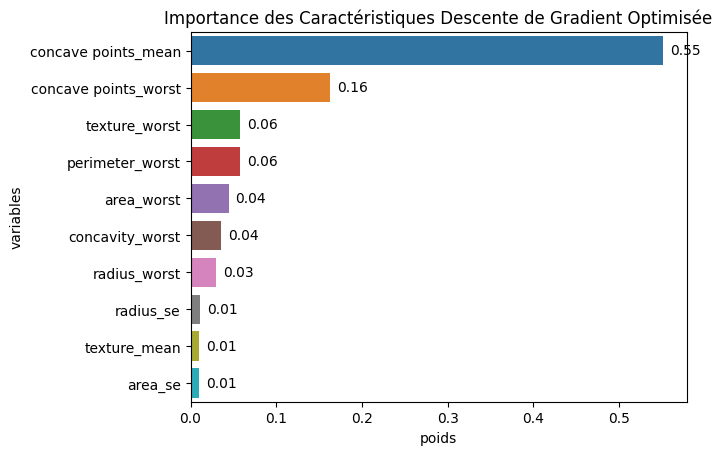

In [350]:
# Feature of importance
estimator = gb_gr.best_estimator_

# Obtain feature importances
importances = estimator.feature_importances_

importance_df = pd.DataFrame({
    'variables': X.columns,
    'poids': importances
}).sort_values('poids', ascending=False)

plt.title("Importance des Caractéristiques Descente de Gradient Optimisée")
ax = sns.barplot(data=importance_df.head(10), x='poids', y='variables')

# Afficher les valeurs en bout de barre
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.2f'), (p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', ha='left', va='center')

plt.show()


<h1> Random Forest

In [351]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt

# Initialisation du modèle Random Forest
rf = RandomForestClassifier()

# Entraînement du modèle
rf.fit(X_train, y_train)

# Prédictions
y_pred = rf.predict(X_test)

# Probabilités
y_pred_proba = rf.predict_proba(X_test)[:, 1]
fpr, tpr, tresholds = roc_curve(y_test, y_pred_proba, pos_label=1)

# Stocker les performances dans un DataFrame
result = pd.DataFrame({"Model": ["RandomForestClassifier"],
                       "Accuracy": [metrics.accuracy_score(y_test, y_pred)],
                       "Recall": [metrics.recall_score(y_test, y_pred)],
                       "Precision": [metrics.precision_score(y_test, y_pred)],
                       "F1_score": [metrics.f1_score(y_test, y_pred, average="macro")],
                       "AUC": [roc_auc_score(y_test, y_pred_proba)]}
                     )

model_result = pd.concat([model_result, result])
print(model_result)

                               Model  Accuracy    Recall  Precision  F1_score  \
0                 LogisticRegression  0.989362  0.985075   0.985075  0.988405   
0    GridSearch Logisctic Regression  0.984043  0.985075   0.970588  0.982665   
0             DecisionTreeClassifier  0.904255  0.910448   0.835616  0.897579   
0  GridSearch DecisionTreeClassifier  0.861702  0.746269   0.847458  0.844825   
0                   Descent Gradient  0.952128  0.925373   0.939394  0.947647   
0        GridSearch Descent Gradient  0.957447  0.925373   0.953846  0.953304   
0             RandomForestClassifier  0.968085  0.940299   0.969231  0.964978   

        AUC  
0  0.998643  
0  0.998643  
0  0.905637  
0  0.835944  
0  0.992229  
0  0.993092  
0  0.995128  


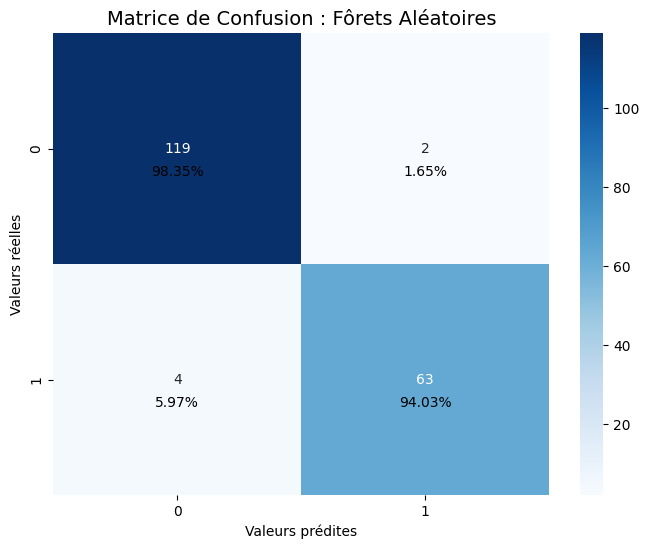

In [352]:
draw_confusion_matrix(y_test, y_pred, "Fôrets Aléatoires")

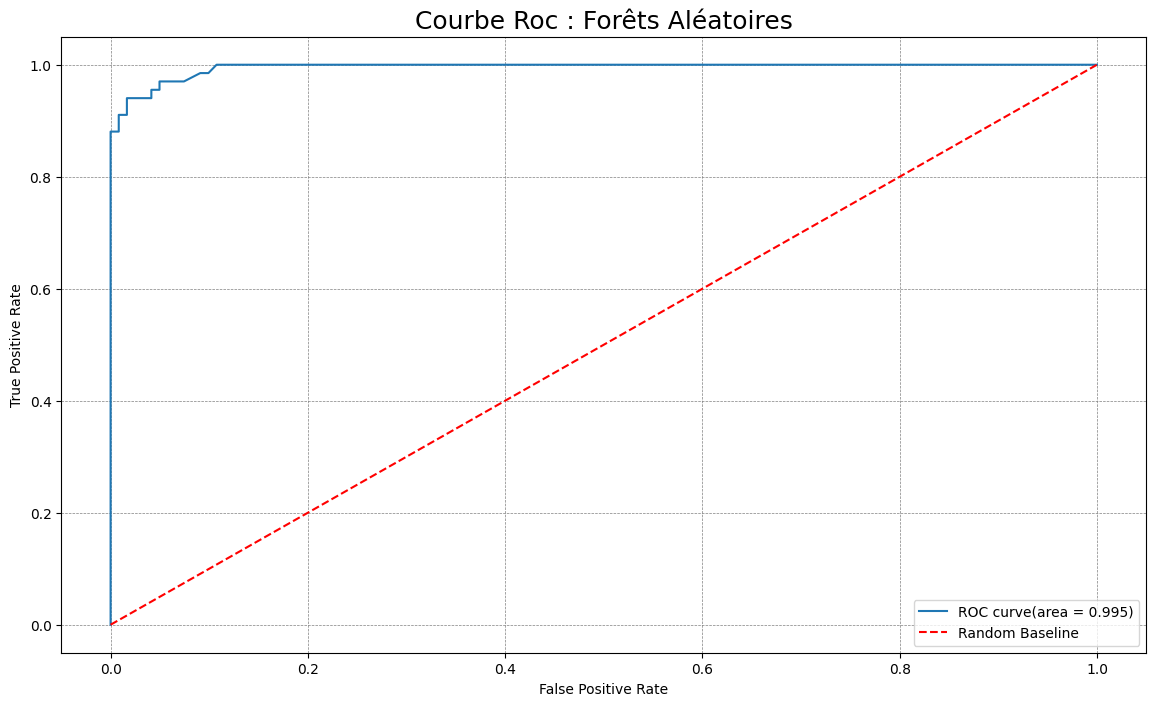

In [353]:
draw_roc_curbe(y_test, y_pred_proba, "Forêts Aléatoires")

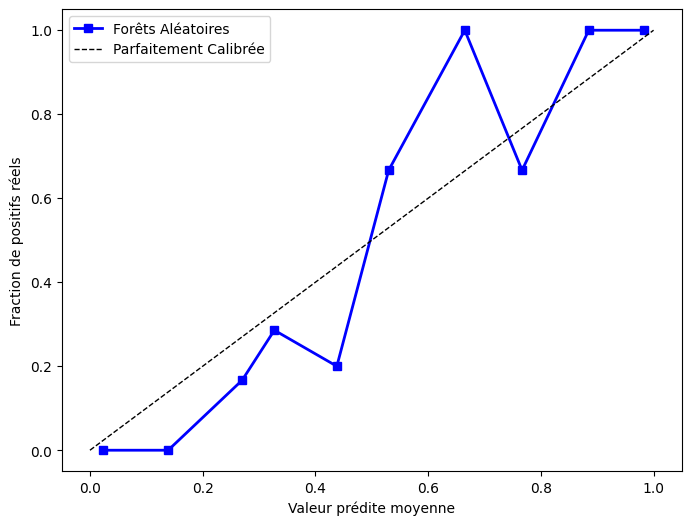

In [354]:
draw_calibration_curve(y_test, y_pred_proba, "Forêts Aléatoires")

<h3> importance des variables 

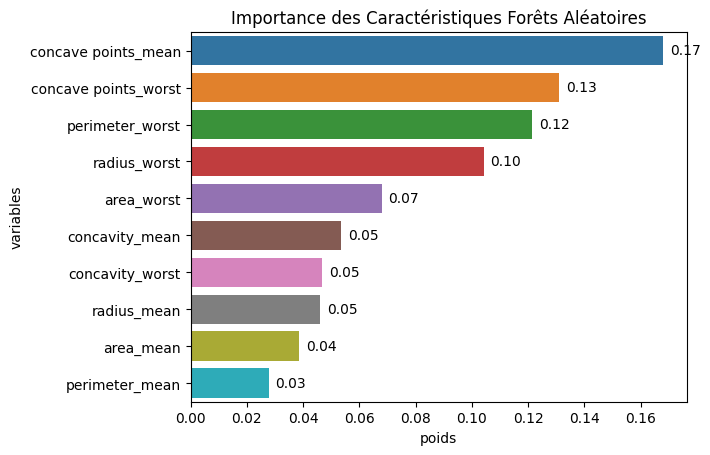

In [355]:
importance_df = pd.DataFrame({
    'variables': X.columns,
    'poids': rf.feature_importances_
}).sort_values('poids', ascending=False)

plt.title("Importance des Caractéristiques Forêts Aléatoires")
ax = sns.barplot(data=importance_df.head(10), x='poids', y='variables')

# Afficher les valeurs en bout de barre
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.2f'), (p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', ha='left', va='center')

plt.show()


<h1> GridSearch Random Forest 

In [356]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt

# Initialisation du modèle Random Forest
rf = RandomForestClassifier()

# Paramètres à tester
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Recherche par grille (Grid Search)
rf_gr = GridSearchCV(rf, param_grid, cv=5)
rf_gr.fit(X_train, y_train)

# Meilleurs paramètres trouvés
best_params = rf_gr.best_params_

# Entraînement du modèle avec les meilleurs paramètres
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)

# Prédictions
y_pred = best_rf.predict(X_test)

# Probabilités
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]
fpr, tpr, tresholds = roc_curve(y_test, y_pred_proba, pos_label=1)

# Stocker les performances dans un DataFrame
result = pd.DataFrame({"Model": ["GridSearch RandomForestClassifier"],
                       "Accuracy": [metrics.accuracy_score(y_test, y_pred)],
                       "Recall": [metrics.recall_score(y_test, y_pred)],
                       "Precision": [metrics.precision_score(y_test, y_pred)],
                       "F1_score": [metrics.f1_score(y_test, y_pred, average="macro")],
                       "AUC": [roc_auc_score(y_test, y_pred_proba)]}
                     )

model_result = pd.concat([model_result, result])
print(model_result)


                               Model  Accuracy    Recall  Precision  F1_score  \
0                 LogisticRegression  0.989362  0.985075   0.985075  0.988405   
0    GridSearch Logisctic Regression  0.984043  0.985075   0.970588  0.982665   
0             DecisionTreeClassifier  0.904255  0.910448   0.835616  0.897579   
0  GridSearch DecisionTreeClassifier  0.861702  0.746269   0.847458  0.844825   
0                   Descent Gradient  0.952128  0.925373   0.939394  0.947647   
0        GridSearch Descent Gradient  0.957447  0.925373   0.953846  0.953304   
0             RandomForestClassifier  0.968085  0.940299   0.969231  0.964978   
0  GridSearch RandomForestClassifier  0.952128  0.925373   0.939394  0.947647   

        AUC  
0  0.998643  
0  0.998643  
0  0.905637  
0  0.835944  
0  0.992229  
0  0.993092  
0  0.995128  
0  0.995189  


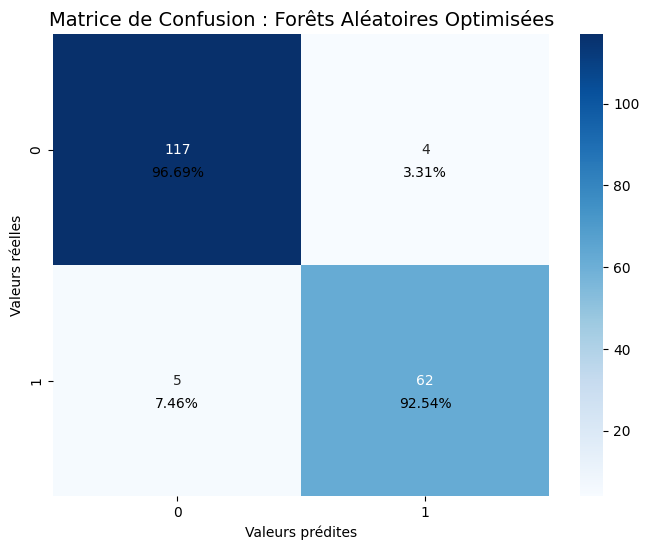

In [357]:
draw_confusion_matrix(y_test, y_pred, "Forêts Aléatoires Optimisées")

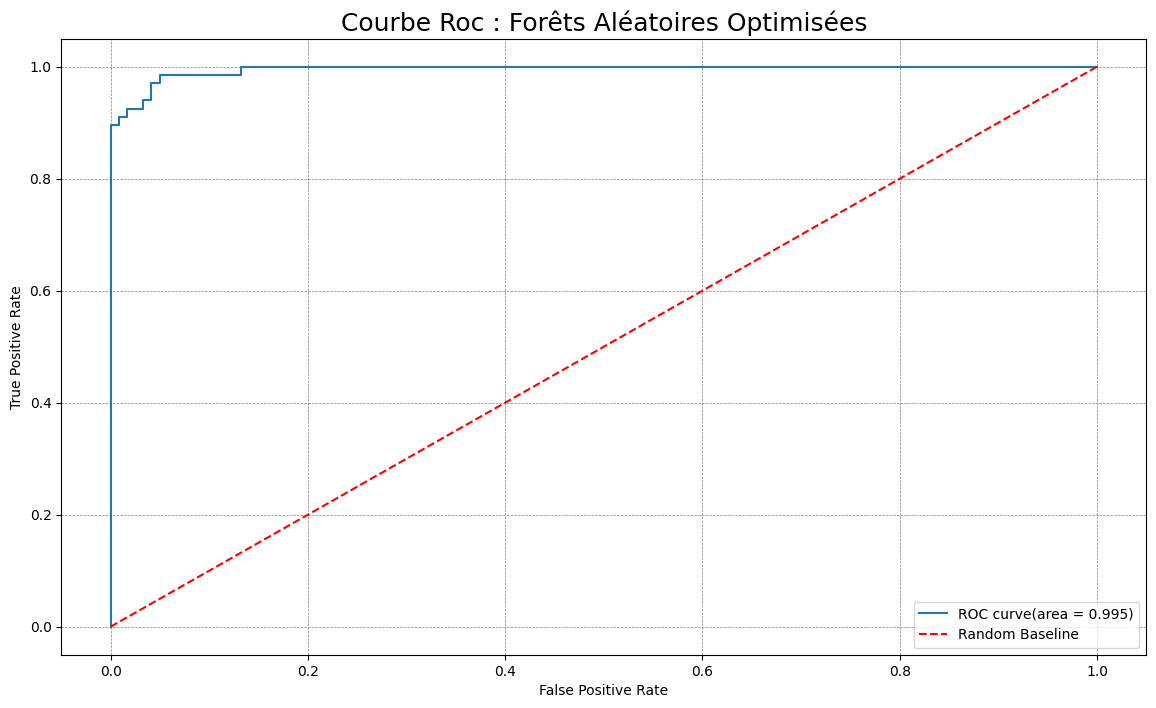

In [358]:
draw_roc_curbe(y_test, y_pred_proba, "Forêts Aléatoires Optimisées")

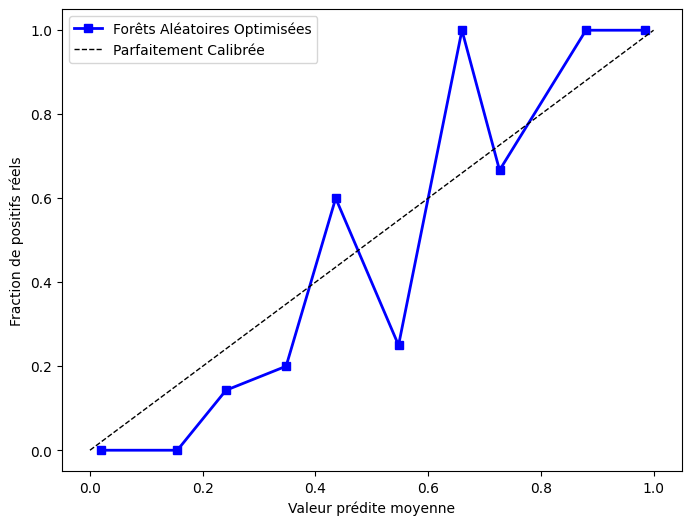

In [359]:
draw_calibration_curve(y_test, y_pred_proba, "Forêts Aléatoires Optimisées")

<H3> importance des variables 

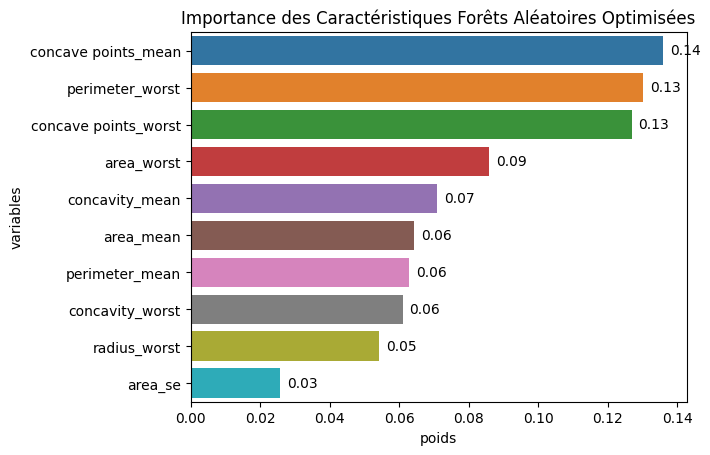

In [360]:
# Feature of importance
estimator = rf_gr.best_estimator_

# Obtain feature importances
importances = estimator.feature_importances_

importance_df = pd.DataFrame({
    'variables': X.columns,
    'poids': importances
}).sort_values('poids', ascending=False)

plt.title("Importance des Caractéristiques Forêts Aléatoires Optimisées")
ax = sns.barplot(data=importance_df.head(10), x='poids', y='variables')

# Afficher les valeurs en bout de barre
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.2f'), (p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', ha='left', va='center')

plt.show()


<h1> XG Boost

In [361]:
!pip install xgboost

In [362]:
from xgboost import XGBClassifier
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt

# Initialisation du modèle XGBoost
xgb = XGBClassifier()

# Entraînement du modèle
xgb.fit(X_train, y_train)

# Prédictions
y_pred = xgb.predict(X_test)

# Probabilités
y_pred_proba = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, tresholds = roc_curve(y_test, y_pred_proba, pos_label=1)

# Stocker les performances dans un DataFrame
result = pd.DataFrame({"Model": ["XGBClassifier"],
                       "Accuracy": [metrics.accuracy_score(y_test, y_pred)],
                       "Recall": [metrics.recall_score(y_test, y_pred)],
                       "Precision": [metrics.precision_score(y_test, y_pred)],
                       "F1_score": [metrics.f1_score(y_test, y_pred, average="macro")],
                       "AUC": [roc_auc_score(y_test, y_pred_proba)]}
                     )

model_result = pd.concat([model_result, result])
print(model_result)


                               Model  Accuracy    Recall  Precision  F1_score  \
0                 LogisticRegression  0.989362  0.985075   0.985075  0.988405   
0    GridSearch Logisctic Regression  0.984043  0.985075   0.970588  0.982665   
0             DecisionTreeClassifier  0.904255  0.910448   0.835616  0.897579   
0  GridSearch DecisionTreeClassifier  0.861702  0.746269   0.847458  0.844825   
0                   Descent Gradient  0.952128  0.925373   0.939394  0.947647   
0        GridSearch Descent Gradient  0.957447  0.925373   0.953846  0.953304   
0             RandomForestClassifier  0.968085  0.940299   0.969231  0.964978   
0  GridSearch RandomForestClassifier  0.952128  0.925373   0.939394  0.947647   
0                      XGBClassifier  0.968085  0.940299   0.969231  0.964978   

        AUC  
0  0.998643  
0  0.998643  
0  0.905637  
0  0.835944  
0  0.992229  
0  0.993092  
0  0.995128  
0  0.995189  
0  0.995806  


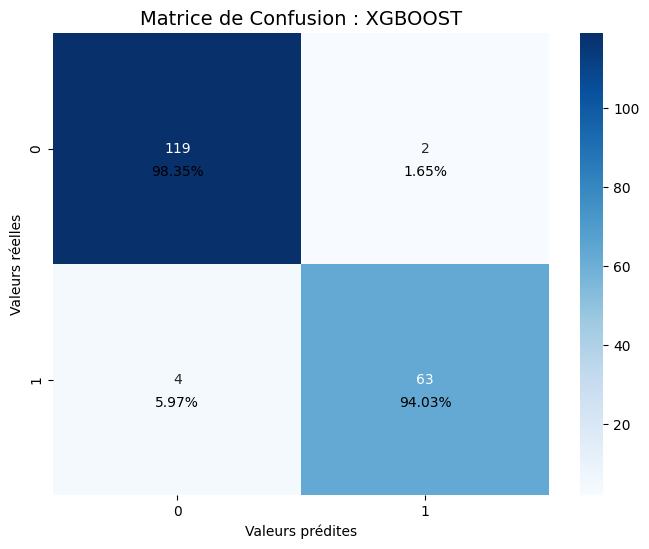

In [363]:
draw_confusion_matrix(y_test, y_pred, "XGBOOST")


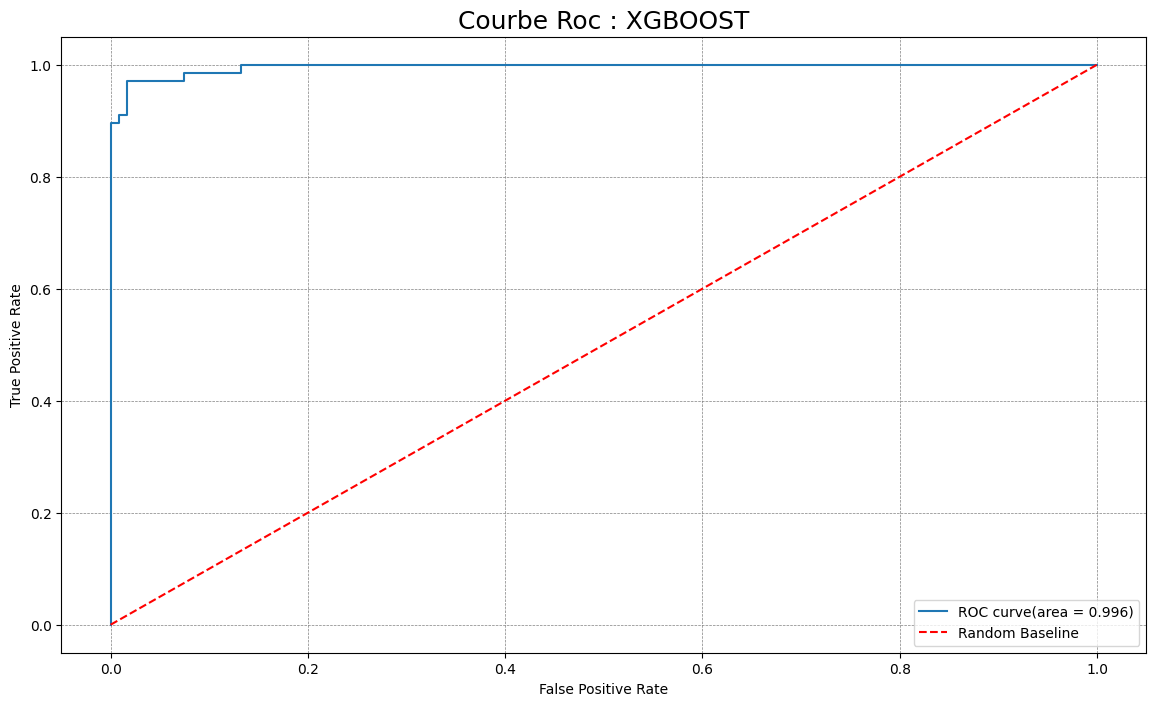

In [364]:
draw_roc_curbe(y_test, y_pred_proba, "XGBOOST")


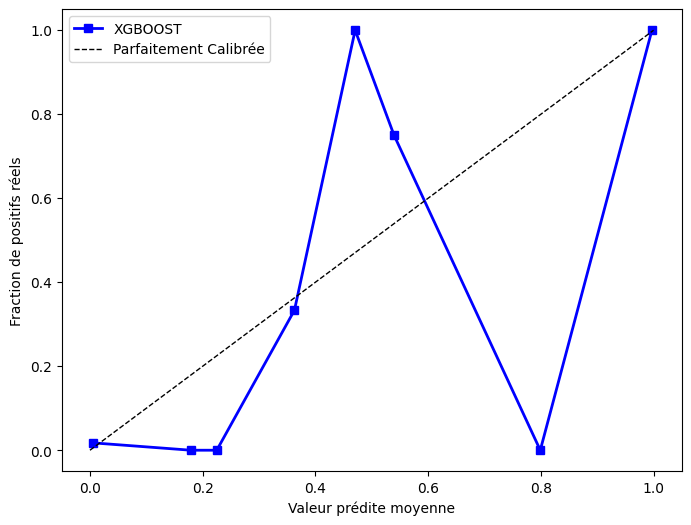

In [365]:
draw_calibration_curve(y_test, y_pred_proba, "XGBOOST")

<H3> importance des variables 

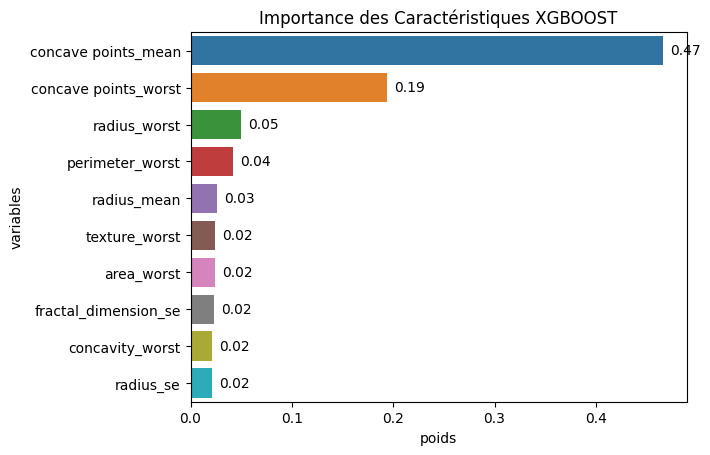

In [366]:
importance_df = pd.DataFrame({
    'variables': X.columns,
    'poids': xgb.feature_importances_
}).sort_values('poids', ascending=False)

plt.title("Importance des Caractéristiques XGBOOST")
ax = sns.barplot(data=importance_df.head(10), x='poids', y='variables')

# Afficher les valeurs en bout de barre
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.2f'), (p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', ha='left', va='center')

plt.show()


<h1> GridSearch XG Boost

In [367]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt

# Initialisation du modèle XGBoost
xgb = XGBClassifier()

# Paramètres à tester
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Recherche par grille (Grid Search)
xgb_gr = GridSearchCV(xgb, param_grid, cv=5)
xgb_gr.fit(X_train, y_train)

# Meilleurs paramètres trouvés
best_params = xgb_gr.best_params_

# Entraînement du modèle avec les meilleurs paramètres
best_xgb = XGBClassifier(**best_params)
best_xgb.fit(X_train, y_train)

# Prédictions
y_pred = best_xgb.predict(X_test)

# Probabilités
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]
fpr, tpr, tresholds = roc_curve(y_test, y_pred_proba, pos_label=1)

# Stocker les performances dans un DataFrame
result = pd.DataFrame({"Model": ["GridSearch XGBClassifier"],
                       "Accuracy": [metrics.accuracy_score(y_test, y_pred)],
                       "Recall": [metrics.recall_score(y_test, y_pred)],
                       "Precision": [metrics.precision_score(y_test, y_pred)],
                       "F1_score": [metrics.f1_score(y_test, y_pred, average="macro")],
                       "AUC": [roc_auc_score(y_test, y_pred_proba)]}
                     )

model_result = pd.concat([model_result, result])
print(model_result)


                               Model  Accuracy    Recall  Precision  F1_score  \
0                 LogisticRegression  0.989362  0.985075   0.985075  0.988405   
0    GridSearch Logisctic Regression  0.984043  0.985075   0.970588  0.982665   
0             DecisionTreeClassifier  0.904255  0.910448   0.835616  0.897579   
0  GridSearch DecisionTreeClassifier  0.861702  0.746269   0.847458  0.844825   
0                   Descent Gradient  0.952128  0.925373   0.939394  0.947647   
0        GridSearch Descent Gradient  0.957447  0.925373   0.953846  0.953304   
0             RandomForestClassifier  0.968085  0.940299   0.969231  0.964978   
0  GridSearch RandomForestClassifier  0.952128  0.925373   0.939394  0.947647   
0                      XGBClassifier  0.968085  0.940299   0.969231  0.964978   
0           GridSearch XGBClassifier  0.962766  0.940299   0.954545  0.959281   

        AUC  
0  0.998643  
0  0.998643  
0  0.905637  
0  0.835944  
0  0.992229  
0  0.993092  
0  0.99512

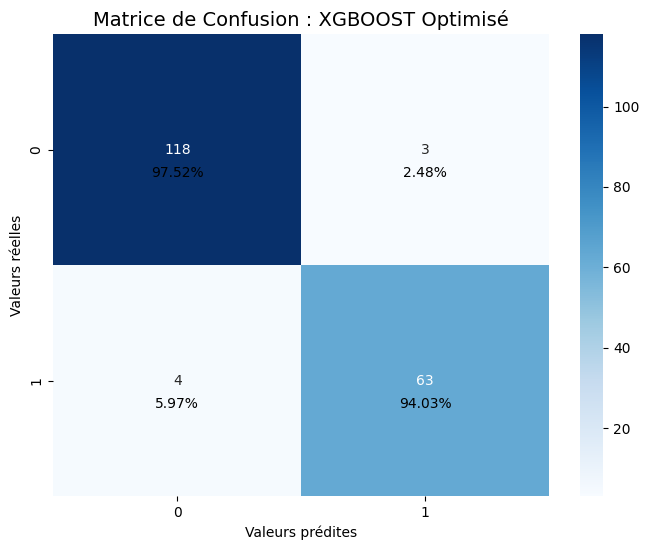

In [368]:
draw_confusion_matrix(y_test, y_pred, "XGBOOST Optimisé")

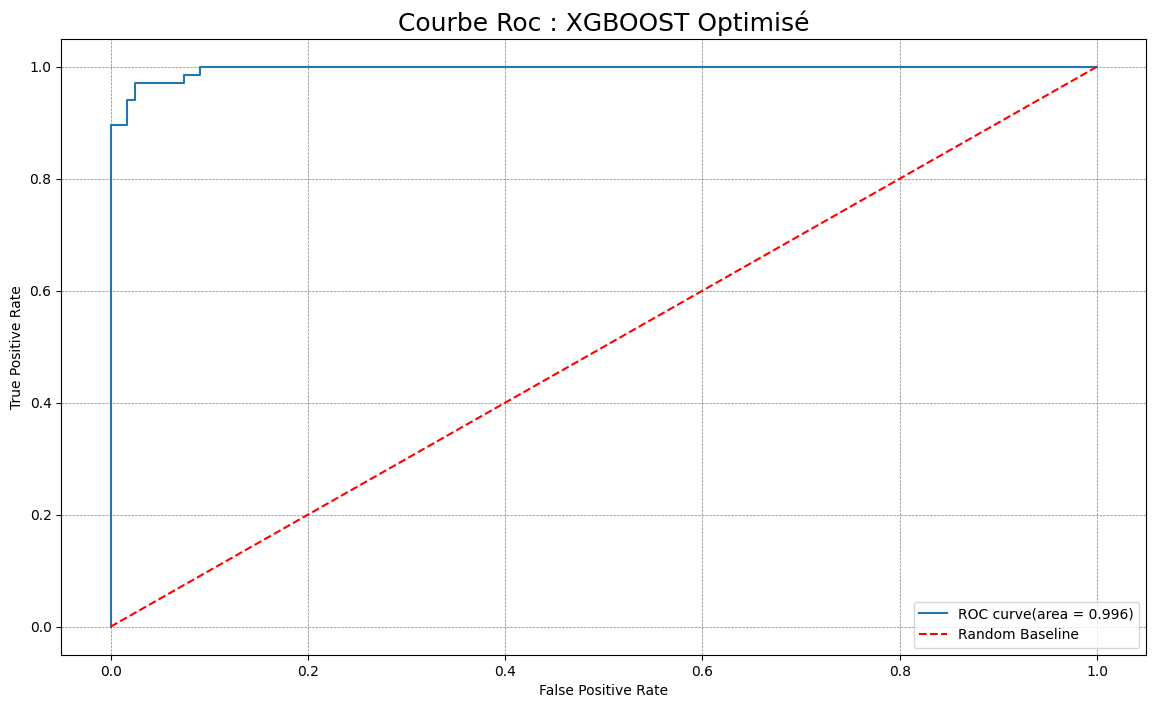

In [369]:
draw_roc_curbe(y_test, y_pred_proba, "XGBOOST Optimisé")

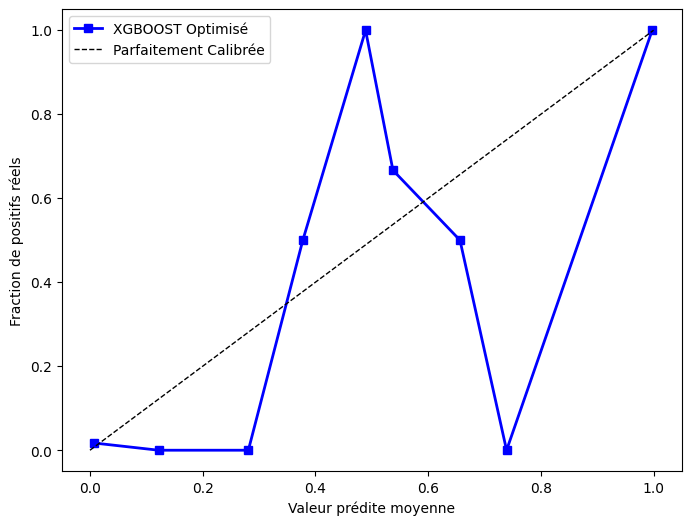

In [370]:
draw_calibration_curve(y_test, y_pred_proba, "XGBOOST Optimisé")


<H3> importance des variables 

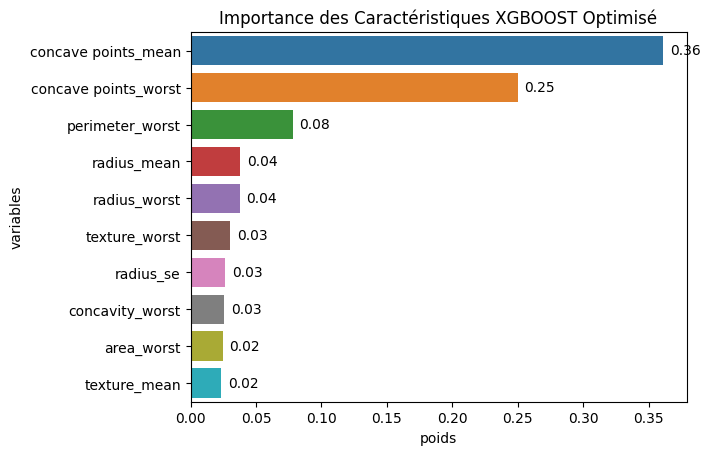

In [371]:
# Feature of importance
estimator = xgb_gr.best_estimator_

# Obtain feature importances
importances = estimator.feature_importances_

importance_df = pd.DataFrame({
    'variables': X.columns,
    'poids': importances
}).sort_values('poids', ascending=False)

plt.title("Importance des Caractéristiques XGBOOST Optimisé")
ax = sns.barplot(data=importance_df.head(10), x='poids', y='variables')

# Afficher les valeurs en bout de barre
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.2f'), (p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', ha='left', va='center')

plt.show()


<h1> Comparaison des modèles 

<h3> Comparaison par AUC 

In [190]:
import seaborn as sns

sns.barplot(data=model_result, x="Model", y="AUC")
plt.xticks(rotation=90)
plt.title("Model's Performance")

# Ajouter les valeurs au bout des barres
for index, row in model_result.iterrows():
    plt.text(index, row['AUC'], f"{row['AUC']:.3f}", ha='center', va='bottom')

plt.show()


TypeError: Neither the `x` nor `y` variable appears to be numeric.

<h3> Comparaison par accuracy 

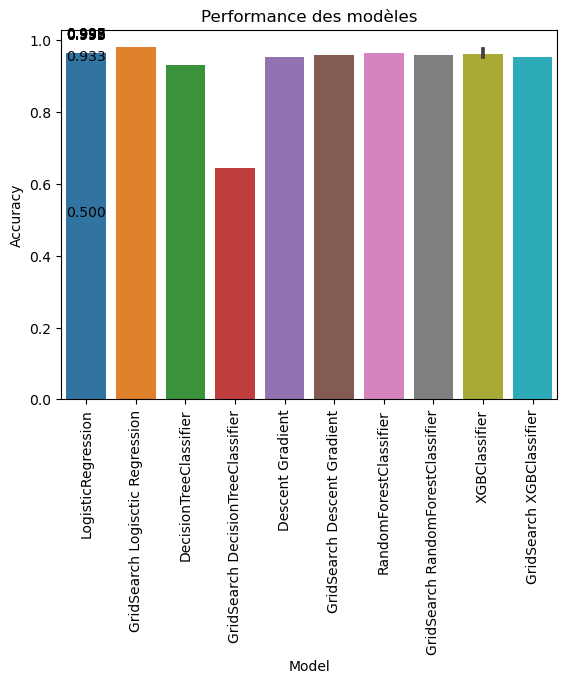

In [141]:
import seaborn as sns

sns.barplot(data=model_result, x="Model", y="Accuracy")
plt.xticks(rotation=90)
plt.title("Performance des modèles")

# Ajouter les valeurs au bout des barres
for index, row in model_result.iterrows():
    plt.text(index, row['AUC'], f"{row['AUC']:.3f}", ha='center', va='bottom')

plt.show()
